Comencem a familiaritzar-nos amb Pipelines, grid search i text mining !!! Comencem amb uns quants exercicis bàsics

### Nivell 1
**- Exercici 1:**

Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('pima-indians-diabetes.csv', header = None)

In [25]:
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [26]:
# asignación de nombres a las columnas
df.columns = ['Pregnancies', 'Glucose' , 'Blood_Preassure', 'Skin_Thickness',
               'Insuline', 'BMI', 'Diabetes_Pedigree_Function', 'Age', 'Class']

In [27]:
# al importar el DF, la columna Diabetes_pedigree_function los valores se han
# importado como decimales. El DF Original eran centenas. Se corrige.
df['Diabetes_Pedigree_Function'] = df['Diabetes_Pedigree_Function'].apply(lambda x: x*1000)

In [28]:
df.head()

,Pregnancies,Glucose,Blood_Preassure,Skin_Thickness,Insuline,BMI,Diabetes_Pedigree_Function,Age,Class
0,6,148,72,35,0,33.6,627.0,50,1
1,1,85,66,29,0,26.6,351.0,31,0
2,8,183,64,0,0,23.3,672.0,32,1
3,1,89,66,23,94,28.1,167.0,21,0
4,0,137,40,35,168,43.1,2288.0,33,1


### Pipeline

In [29]:
feature_cols = ['Pregnancies', 'Glucose' , 'Blood_Preassure', 'Skin_Thickness',
               'Insuline', 'BMI', 'Diabetes_Pedigree_Function', 'Age']

In [30]:

x = df[feature_cols]
y = df['Class']

In [31]:
# estandarización de vaores con la función MinMaxScaler
df = pd.DataFrame(MinMaxScaler(df.values), columns=df.columns, index=df.index)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state = 42 )

In [33]:
# Creación del modelo modificando PCA y la profundidad de Random Forest
Random_Forest_pipeline = Pipeline([('my_PCA', PCA(n_components = 3)),
                                   ('logistic_classifier', RandomForestRegressor(max_depth=10))])

In [34]:
Random_Forest_pipeline.fit(X_train, y_train)

# predict target values on the training data
Random_Forest_pipeline.predict(X_train)

array([7.31578561e-01, 1.71656701e-01, 1.62244898e-02, 2.40147059e-02,
       9.98433856e-02, 0.00000000e+00, 6.83586111e-01, 8.39043504e-01,
       4.51867945e-02, 0.00000000e+00, 4.26223317e-01, 1.13026316e-01,
       2.99764348e-01, 3.08695652e-02, 0.00000000e+00, 1.47893205e-01,
       9.20000000e-01, 8.55190476e-01, 2.15481275e-01, 1.44690114e-01,
       7.98622393e-02, 3.08902156e-01, 6.39730133e-01, 6.71104604e-02,
       2.82355311e-01, 7.11299359e-01, 1.74934699e-01, 2.61428571e-01,
       8.80000000e-01, 4.68695652e-02, 1.59777778e-01, 8.88721897e-02,
       2.62272727e-02, 1.48388546e-01, 5.51745304e-01, 6.16033622e-01,
       2.30545678e-01, 1.00507127e-02, 0.00000000e+00, 0.00000000e+00,
       3.23109244e-02, 6.01791711e-01, 1.01339172e-01, 0.00000000e+00,
       3.00000000e-02, 2.11093419e-01, 6.00290346e-01, 7.48416394e-01,
       2.93777335e-01, 2.08525103e-02, 6.03674819e-01, 2.83909956e-01,
       2.81100679e-02, 2.64740637e-01, 2.47477719e-01, 2.97777778e-02,
      

In [35]:
# Predicción
predict_train = Random_Forest_pipeline.predict(X_train)
predict_test = Random_Forest_pipeline.predict(X_test)

# RMSE del train and test 
print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**(0.5))

RMSE on train data:  0.19922203424831628
RMSE on test data:  0.44591551677314745


### Gridsearch

In [36]:
# Listado de los parámetros modificables para el modelo
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [37]:
# Trees del random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Número de valores por cada split
max_features = ['auto', 'sqrt']
# Profundidad del Random Forest
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Número mínimo de muestras por split
min_samples_split = [2, 5, 10]
# Mínimo de muestras por nivel del Ranfom Forest (leaf)
min_samples_leaf = [1, 2, 4]
# Selección de muestra
bootstrap = [True, False]
# Creación del objeto Random Grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [38]:
# Use the random grid to search for best hyperparameters
# Objeto
rf = RandomForestRegressor()

# Random search con modificación de parámetros
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)
# Fitting del modelo con los Train test sets
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [39]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [40]:
# Best estimator
best_random = rf_random.best_estimator_

#Predicciones
predict_train = best_random.predict(X_train)
predict_test = best_random.predict(X_test)

# Root Mean Squared Error
print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ', mean_squared_error(y_test, predict_test)**(0.5))

RMSE on train data:  0.2564960758867486
RMSE on test data:  0.40792931104757624


**- Exercici 2:**

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [41]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [42]:
# Importar  txt
book_file = open("42.txt", "r")
book = book_file.read()

In [43]:
tokenized_text=sent_tokenize(book)

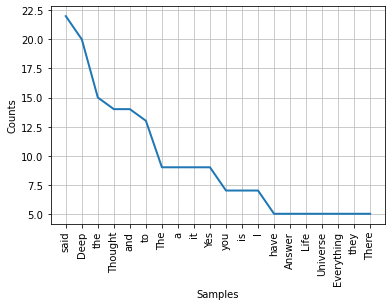

In [44]:
# Conteo de palabras repetidas
tokenized_book = word_tokenize(book)
# Ignorar puntuación
tokenized_book= [word for word in tokenized_book if word.isalnum()]
# repetición de palabras
fdist = FreqDist(tokenized_book)
# 20 palabras más repetidas
fdist.plot(20,cumulative=False)
plt.show()

### Nivell 2

**- Exercici 1:**

Treu les stopwords i realitza stemming al teu conjunt de dades.

### Nivell 3

**- Exercici 1:**

Realitza sentiment analysis al teu conjunt de dades.